In [877]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [878]:
df = pd.read_excel("Data_Train.xlsx")
df_original = df.copy()

In [879]:
df.duplicated().sum()

220

In [880]:
df = df.drop_duplicates()


In [881]:
df.duplicated().sum()

0

In [882]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [883]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [884]:
# can get from Date_of_Journey and Duration

# can use Total_Stops instead
df.drop(columns=['Route'], inplace=True)

#df.drop(columns=['Additional_Info'], inplace=True)


In [885]:
df.duplicated().sum()

0

In [886]:
df = df.drop_duplicates()


In [887]:
df.duplicated().sum()

0

In [888]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [889]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [890]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [891]:
def parse_arrival_time(row):
    try:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M %d %b')
    except ValueError:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M')

In [892]:
#df['Arrival_Time'] = df.apply(parse_arrival_time, axis=1)

In [893]:
# df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
# df['Arrival_Minute'] = df['Arrival_Time'].dt.minute


In [894]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [895]:
df.drop(columns=['Arrival_Time'], inplace=True)  # Drop the original column

In [896]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302


In [897]:
# def convert_duration(duration):
#     hours, minutes = 0, 0
#     if 'h' in duration:
#         hours = int(duration.split('h')[0].strip())
#     if 'm' in duration:
#         minutes_part = duration.split('h')[-1]
#         minutes = int(minutes_part.replace('m', '').strip()) if 'm' in minutes_part else 0
#     return hours * 60 + minutes

# df['Duration'] = df['Duration'].apply(convert_duration)

def convert_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'm' in duration.split('h')[-1] else 0
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(convert_duration)


In [898]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [899]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
8925       1
11774      1
16497      1
8853       1
12648      1
Name: count, Length: 1870, dtype: int64

In [900]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on numerical features
df = remove_outliers(df, 'Price')  # Apply on target variable

In [901]:
df['Duration'].describe()

count    10369.000000
mean       628.545183
std        501.142347
min          5.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration, dtype: float64

In [902]:
df['Duration'].value_counts()

Duration
170     544
90      386
165     333
175     332
155     328
       ... 
2025      1
1890      1
2135      1
2525      1
2860      1
Name: count, Length: 368, dtype: int64

In [903]:
# df = remove_outliers(df, 'Duration')  

In [904]:
df['Duration'].describe()

count    10369.000000
mean       628.545183
std        501.142347
min          5.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration, dtype: float64

In [905]:
df['Price'].describe()

count    10369.000000
mean      8832.673739
std       4069.073914
min       1759.000000
25%       5201.000000
50%       8099.000000
75%      12224.000000
max      23001.000000
Name: Price, dtype: float64

In [906]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
8925       1
11774      1
16497      1
8853       1
12648      1
Name: count, Length: 1826, dtype: int64

In [907]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [908]:
stop_mapping = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\1942022716.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [909]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,0.0,No info,12648


In [910]:
df['Dep_Time'] = df['Dep_Time'].str.strip()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\556642004.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [911]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\2168749574.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\2168749574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\2168749574.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [912]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,1900-01-01 19:55:00,150,0.0,No info,4107,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,1900-01-01 20:45:00,155,0.0,No info,4145,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,1900-01-01 08:20:00,180,0.0,No info,7229,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,1900-01-01 11:30:00,160,0.0,No info,12648,11,30


In [913]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,16,50


In [914]:
df.drop(columns=["Dep_Time"], axis = 1, inplace = True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\4228495051.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [915]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,285,1.0,No info,13302,16,50


In [916]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\1800262841.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [917]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,No info,7662,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2.0,No info,13882,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,No info,6218,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,150,0.0,No info,4107,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,155,0.0,No info,4145,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,180,0.0,No info,7229,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,160,0.0,No info,12648,11,30


In [918]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop(columns=['Date_of_Journey'], inplace=True) 


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3196934081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3196934081.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3196934081.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [919]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3


In [ ]:
from datetime import timedelta


df['Departure_Datetime'] = pd.to_datetime(
    dict(year=2023, month=df['Journey_Month'], day=df['Journey_Day'], hour=df['Dep_Hour'], minute=df['Dep_Minute'])
)


df['Duration_Timedelta'] = df['Duration'].apply(lambda x: timedelta(minutes=x))


df['Arrival_Datetime'] = df['Departure_Datetime'] + df['Duration_Timedelta']


df['Arrival_Day'] = df['Arrival_Datetime'].dt.day
df['Arrival_Month'] = df['Arrival_Datetime'].dt.month

df.drop(columns=['Departure_Datetime', 'Duration_Timedelta', 'Arrival_Datetime'], inplace=True)


print(df[['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute', 'Duration', 'Arrival_Day', 'Arrival_Month']].head())

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3815201769.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3815201769.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3815201769.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

   Journey_Day  Journey_Month  Dep_Hour  Dep_Minute  Duration  Arrival_Day  \
0           24              3        22          20       170           25   
1            1              5         5          50       445            1   
2            9              6         9          25      1140           10   
3           12              5        18           5       325           12   
4            1              3        16          50       285            1   

   Arrival_Month  
0              3  
1              5  
2              6  
3              5  
4              3  


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\3815201769.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [921]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


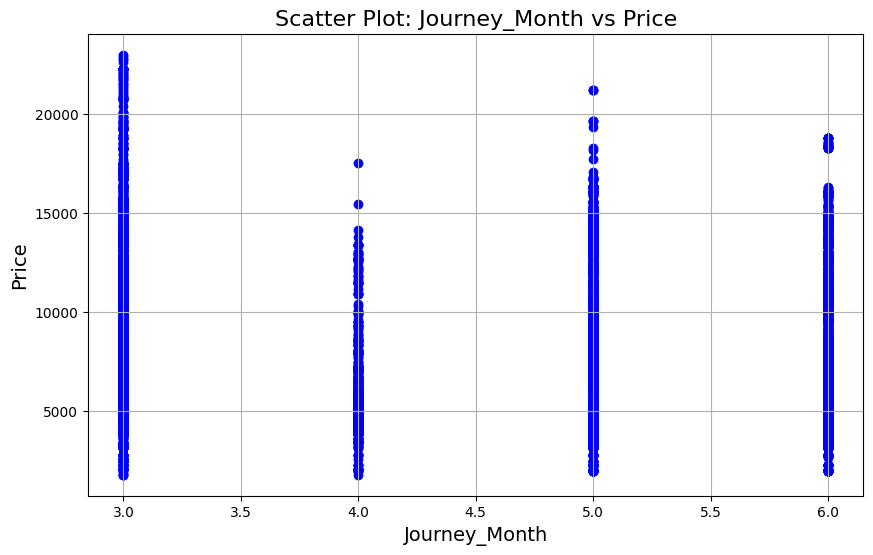

In [922]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Journey_Month'], df['Price'], alpha=1, color='blue')
plt.title("Scatter Plot: Journey_Month vs Price", fontsize=16)
plt.xlabel("Journey_Month", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, alpha=1)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

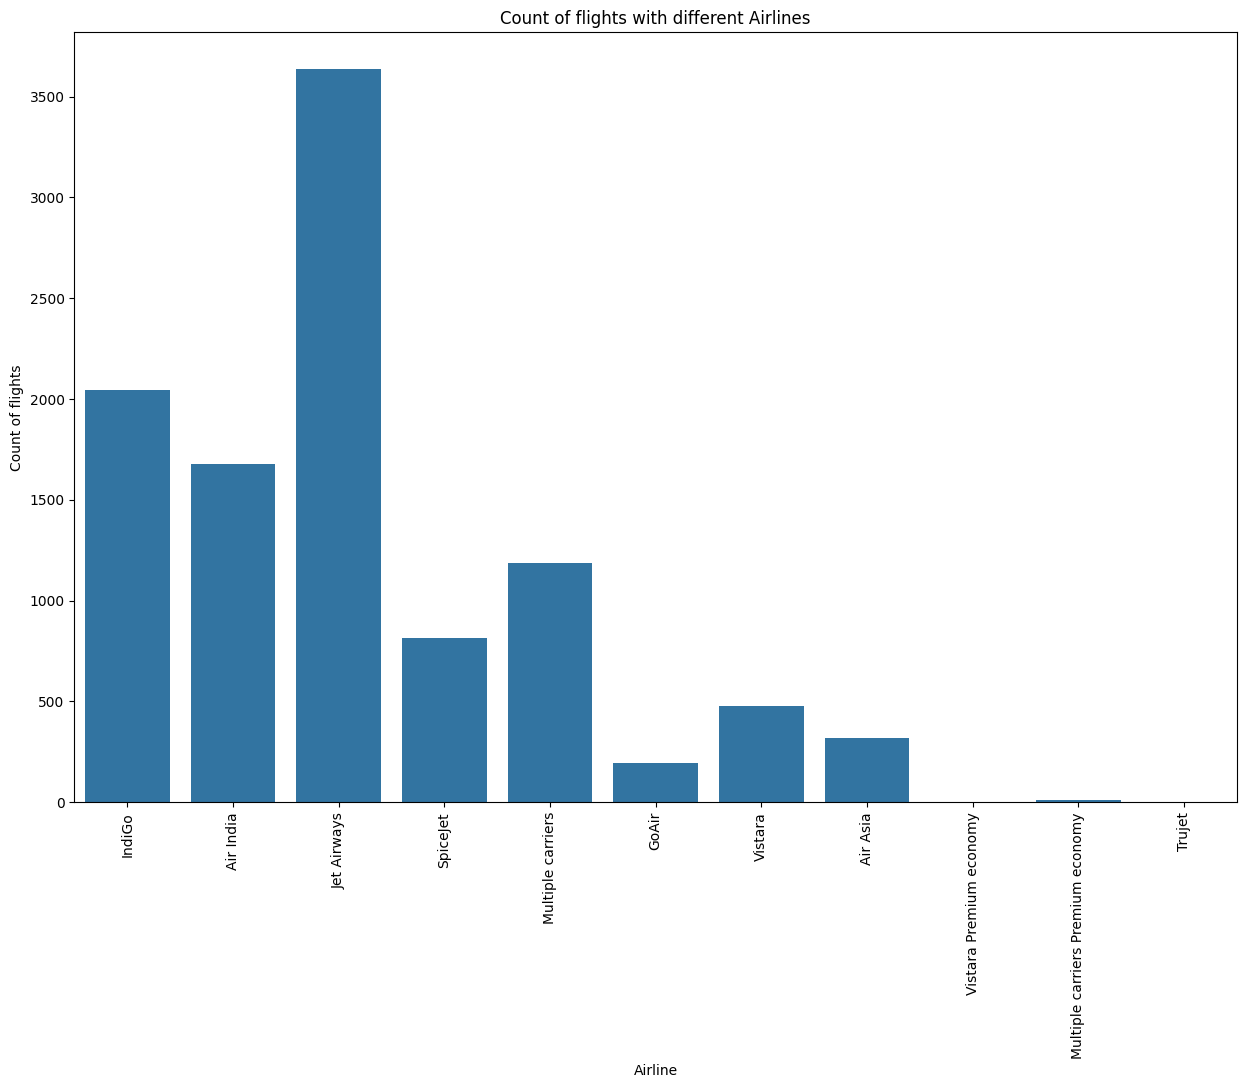

In [923]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\2693356594.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




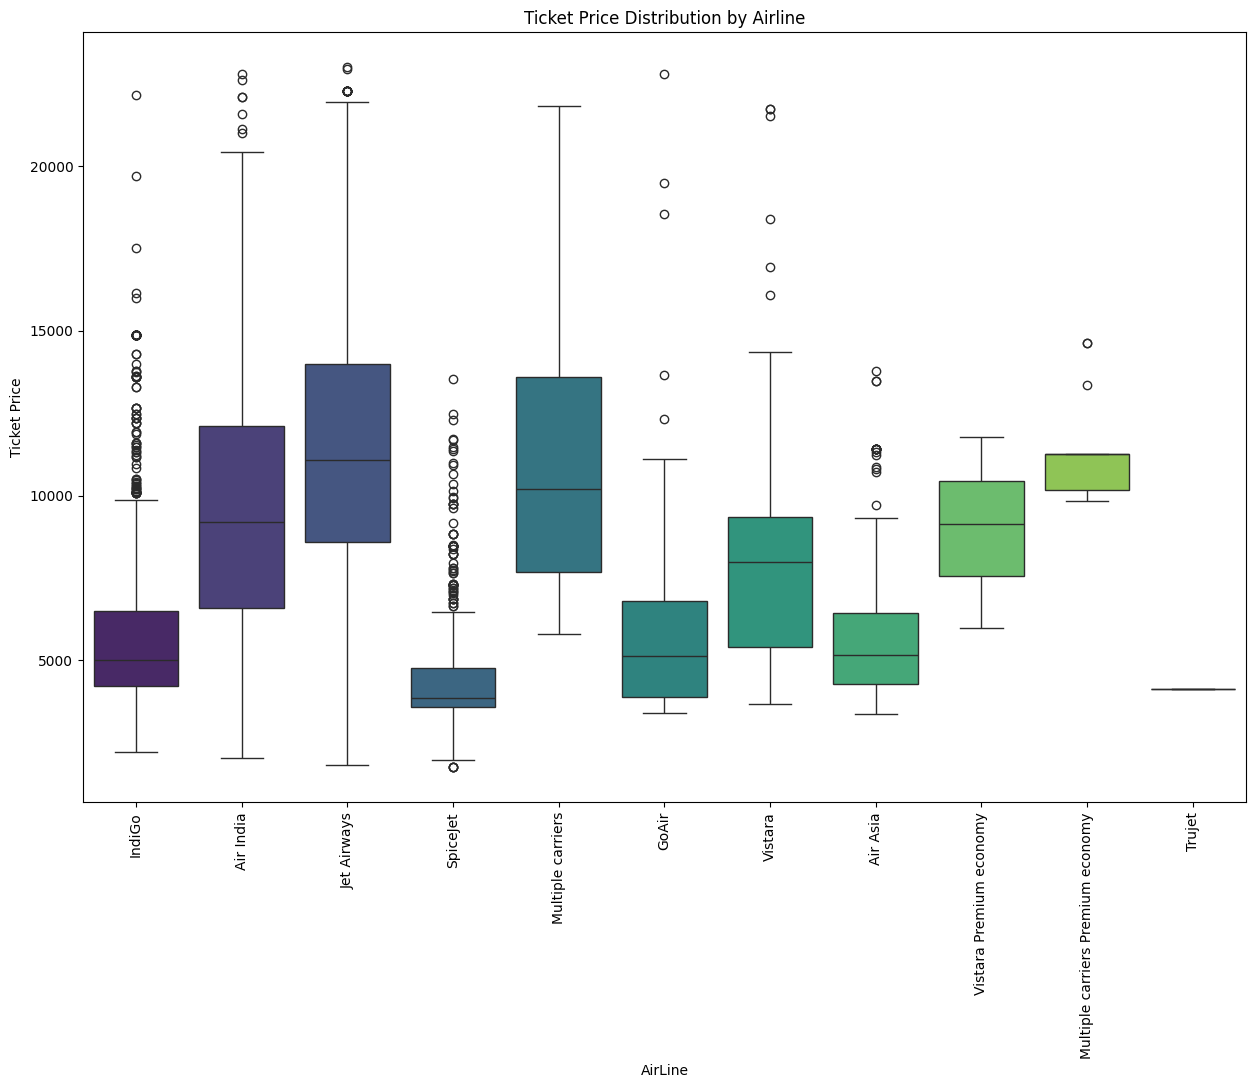

In [924]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x='Airline',
    y='Price',
    data=df,
    palette="viridis"
)
plt.title('Ticket Price Distribution by Airline')
plt.xlabel('AirLine')
plt.ylabel('Ticket Price')
plt.xticks(rotation = 90)
plt.show()

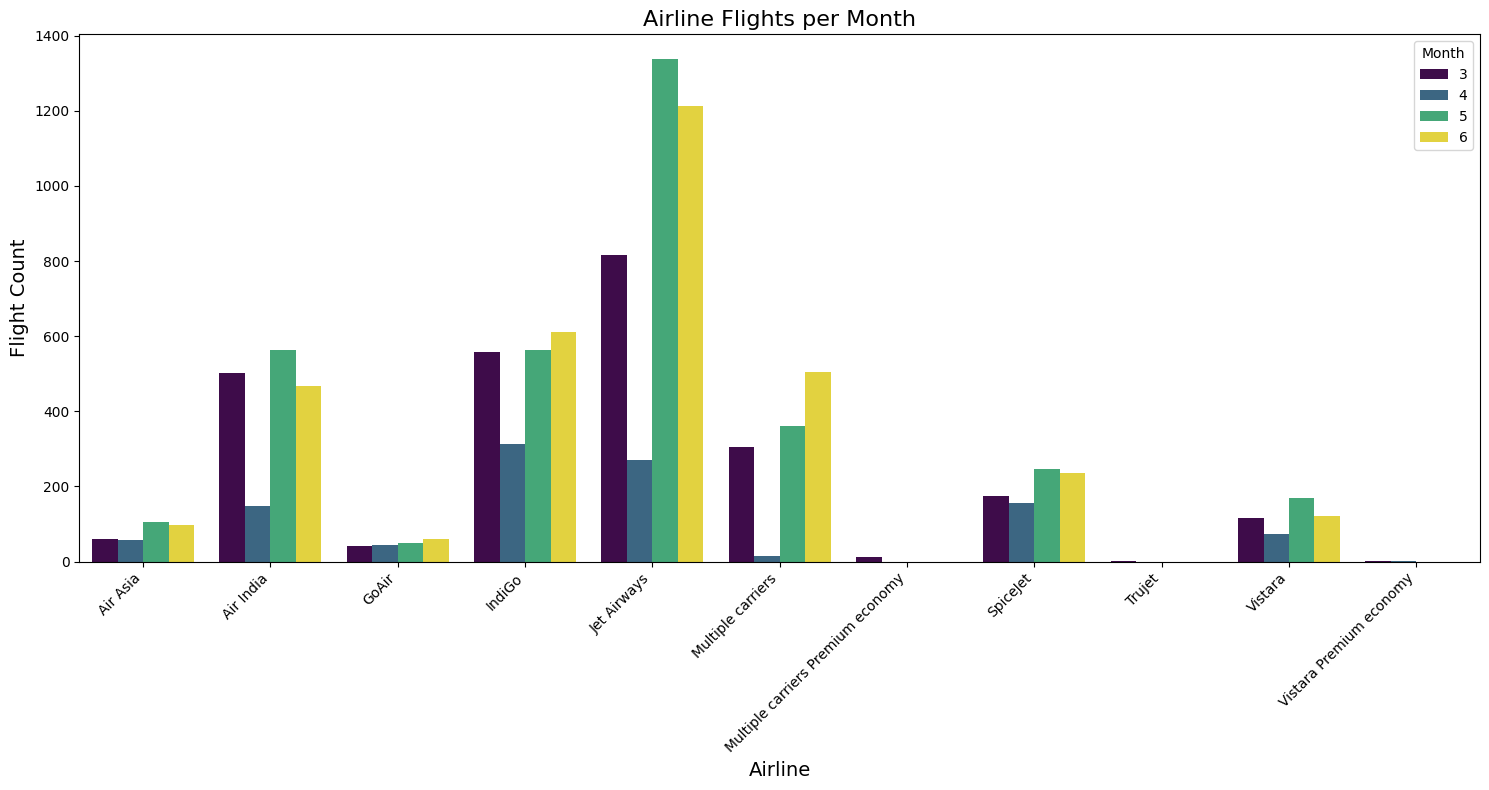

In [925]:
flight_data = df.groupby(['Airline', 'Journey_Month']).size().reset_index(name='Flight_Count')

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Airline',
    y='Flight_Count',
    hue='Journey_Month',
    data=flight_data,
    palette='viridis'
)

plt.title('Airline Flights per Month', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Flight Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [926]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


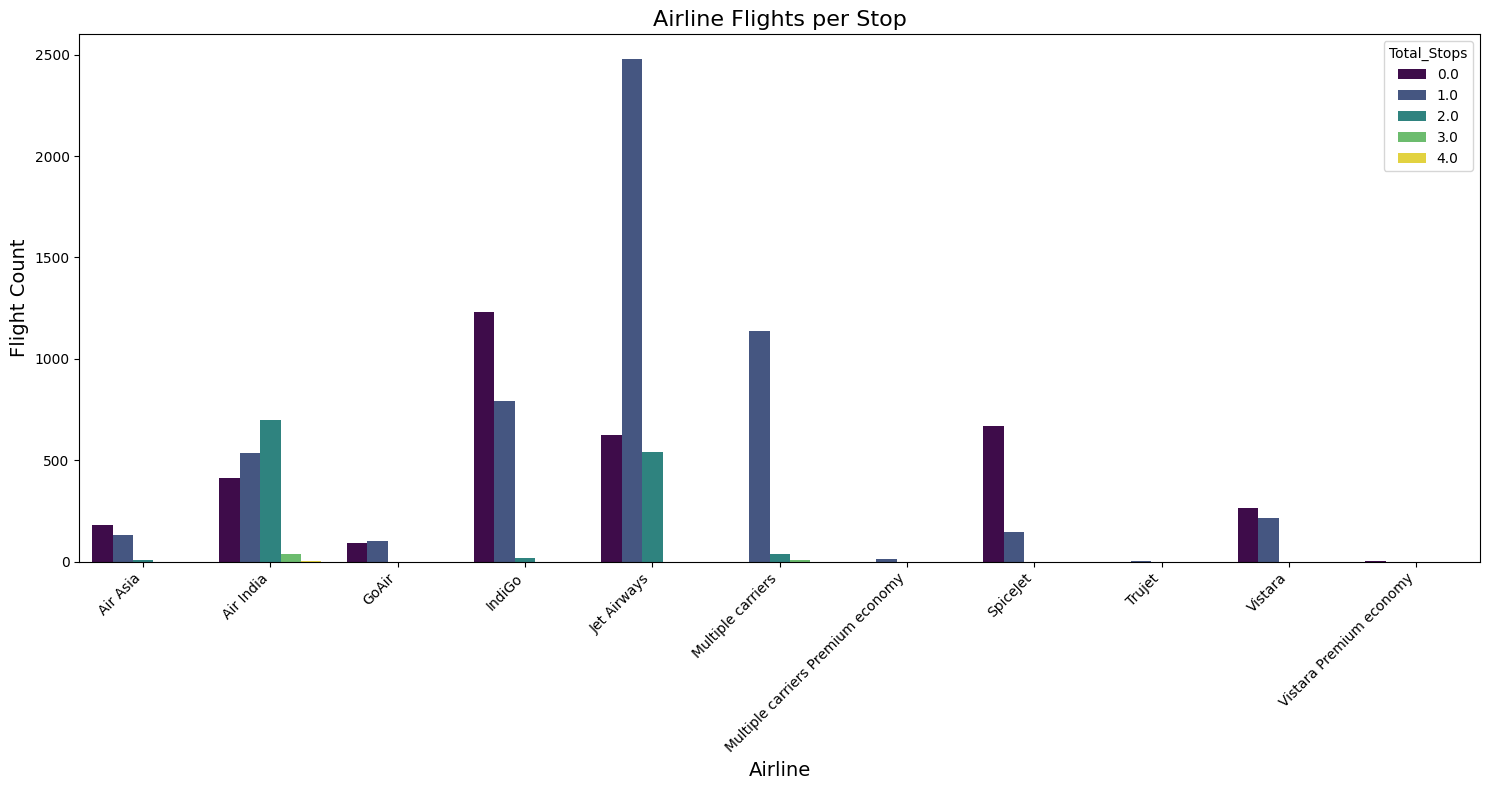

In [927]:
flight_data = df.groupby(['Airline', 'Total_Stops']).size().reset_index(name='Flight_Count')

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Airline',
    y='Flight_Count',
    hue='Total_Stops',
    data=flight_data,
    palette='viridis'
)

plt.title('Airline Flights per Stop', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Flight Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Total_Stops')
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\466558083.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '3'),
  Text(2, 0, '6'),
  Text(3, 0, '9'),
  Text(4, 0, '12'),
  Text(5, 0, '15'),
  Text(6, 0, '18'),
  Text(7, 0, '21'),
  Text(8, 0, '24'),
  Text(9, 0, '27')])

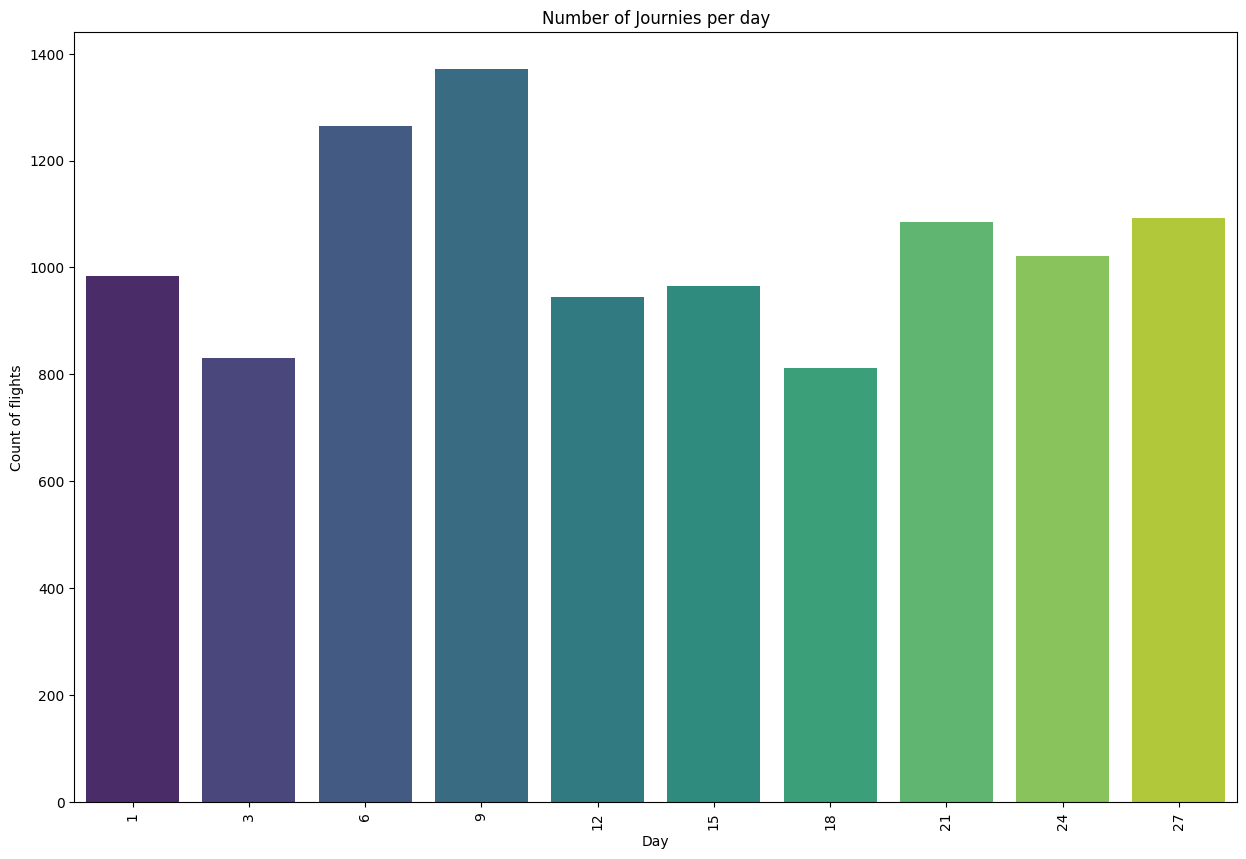

In [928]:
plt.figure(figsize = (15, 10))
plt.title('Number of Journies per day')
ax=sns.countplot(x = 'Journey_Day', data =df ,palette="viridis")
plt.xlabel('Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

([0, 1, 2, 3],
 [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')])

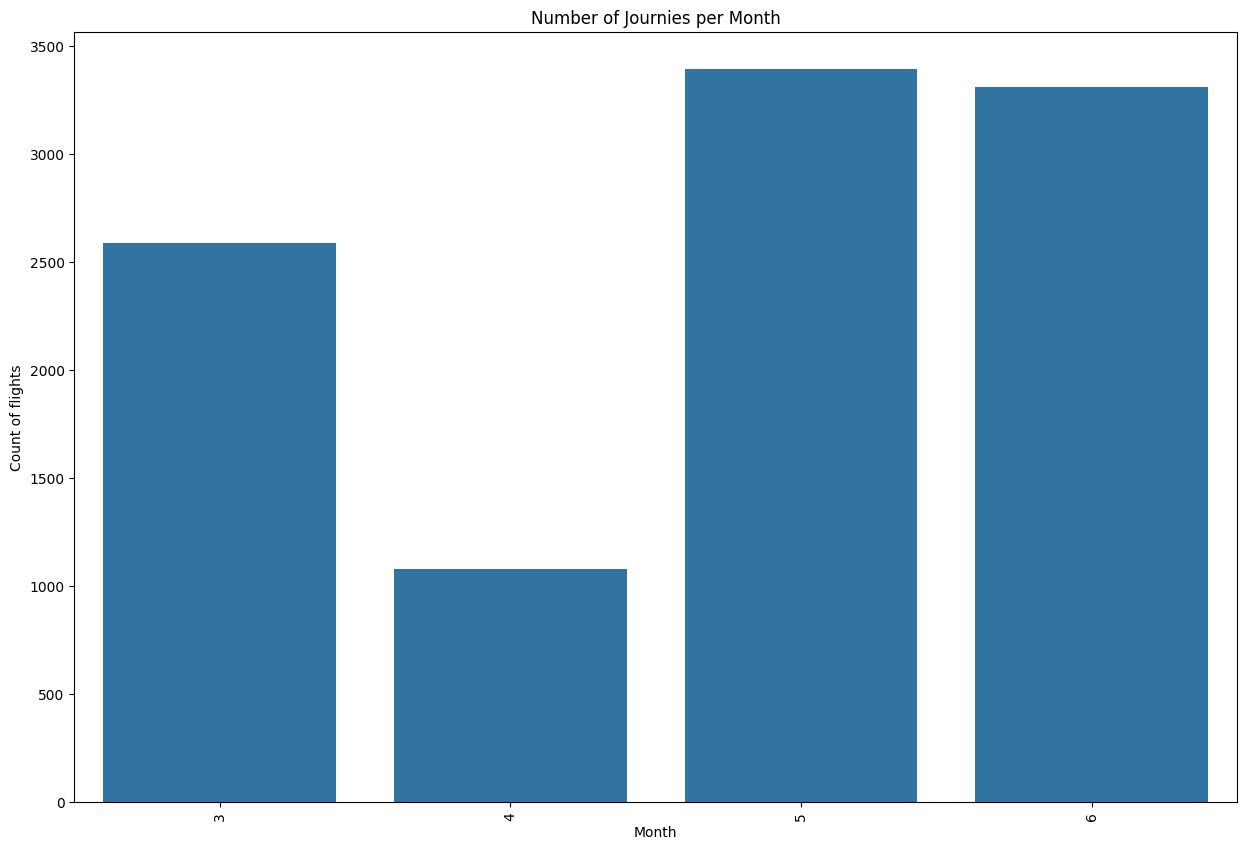

In [929]:
plt.figure(figsize = (15, 10))
plt.title('Number of Journies per Month')
ax=sns.countplot(x = 'Journey_Month', data =df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [930]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\4076408749.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




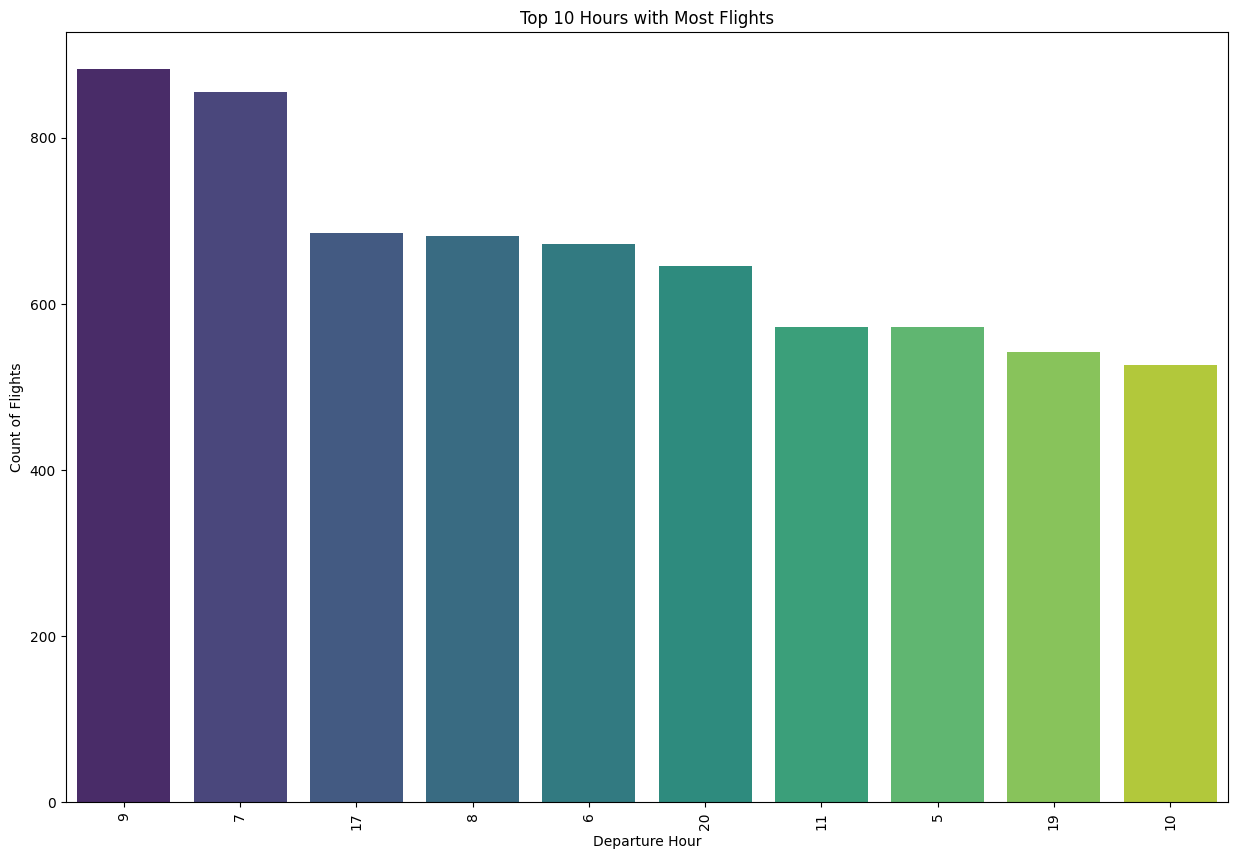

In [931]:
top_10_hours = df['Dep_Hour'].value_counts().nlargest(10).index
filtered_df = df[df['Dep_Hour'].isin(top_10_hours)]
plt.figure(figsize=(15, 10))
plt.title('Top 10 Hours with Most Flights')
ax = sns.countplot(x='Dep_Hour', data=filtered_df, order=top_10_hours ,palette="viridis")
plt.xlabel('Departure Hour')
plt.ylabel('Count of Flights')
plt.xticks(rotation=90)
plt.show()


In [932]:
avg_ticket_prices = df.groupby('Additional_Info')['Price'].mean()

avg_ticket_prices

Additional_Info
1 Long layover                  14616.555556
Change airports                 15252.166667
In-flight meal not included      9435.647456
No check-in baggage included     3642.465409
No info                          8881.575780
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [933]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8109
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                     9
Change airports                    6
Red-eye flight                     1
Name: count, dtype: int64

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\1590901840.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




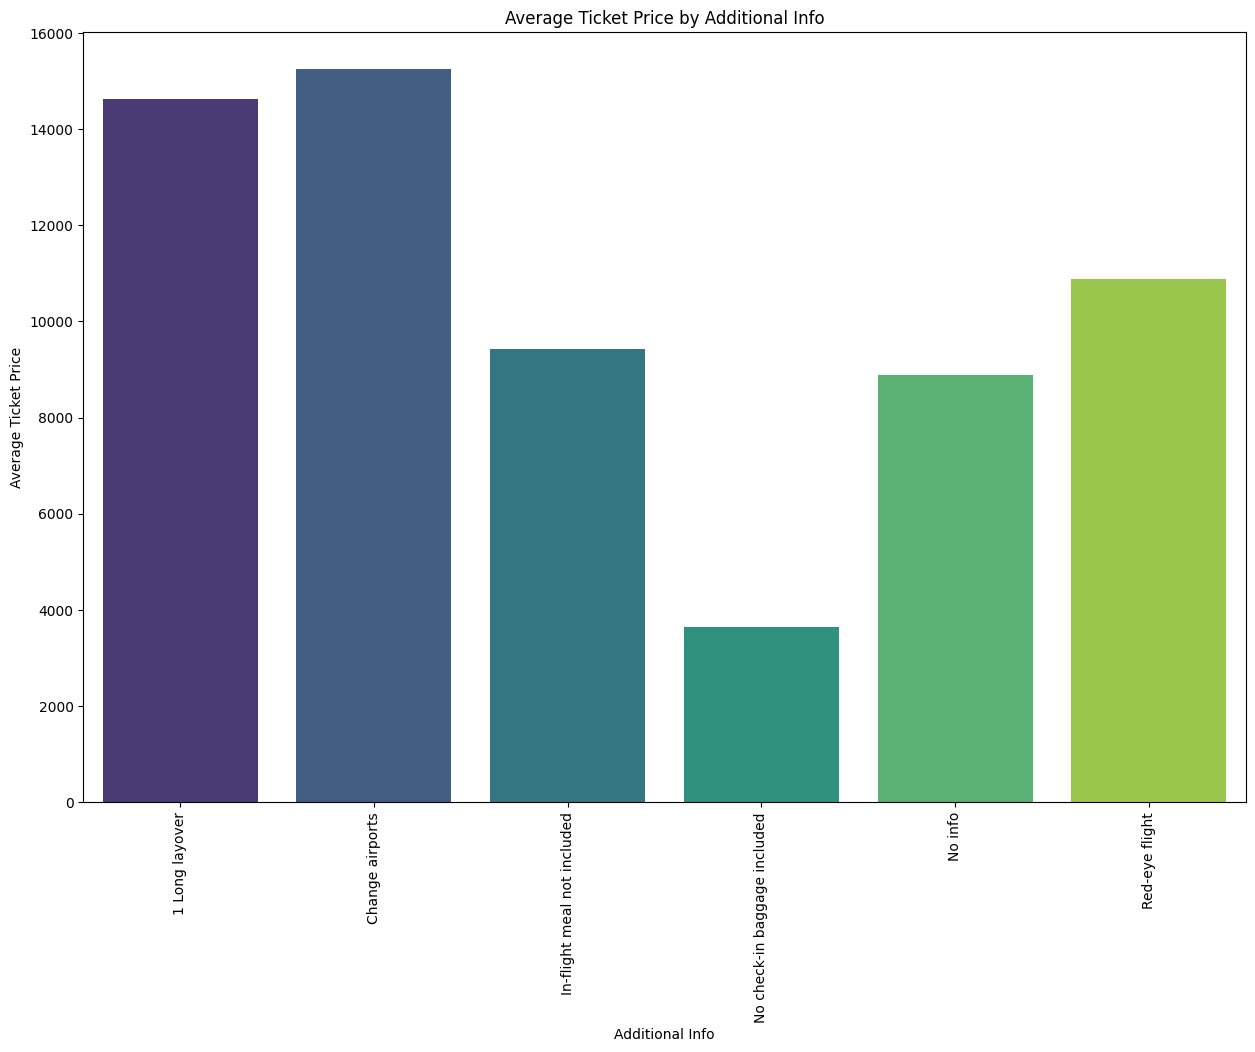

In [934]:
plt.figure(figsize=(15, 10))
plt.title('Average Ticket Price by Additional Info')
sns.barplot(x=avg_ticket_prices.index, y=avg_ticket_prices.values, palette="viridis")
plt.xlabel('Additional Info')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\4214917233.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




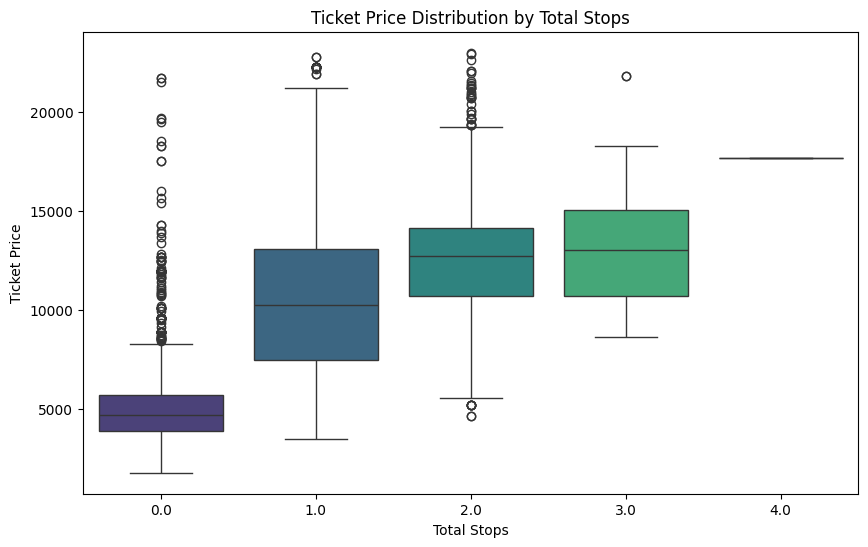

In [935]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Total_Stops',
    y='Price',
    data=df,
    palette="viridis"
)
plt.title('Ticket Price Distribution by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Ticket Price')
plt.show()

In [936]:
avg_price_per_stops = df.groupby('Total_Stops')['Price'].mean().reset_index()

avg_price_per_stops

,Total_Stops,Price
0,0.0,4998.775922
1,1.0,10322.241081
2,2.0,12554.862519
3,3.0,13260.674419
4,4.0,17686.000000


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\145241700.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




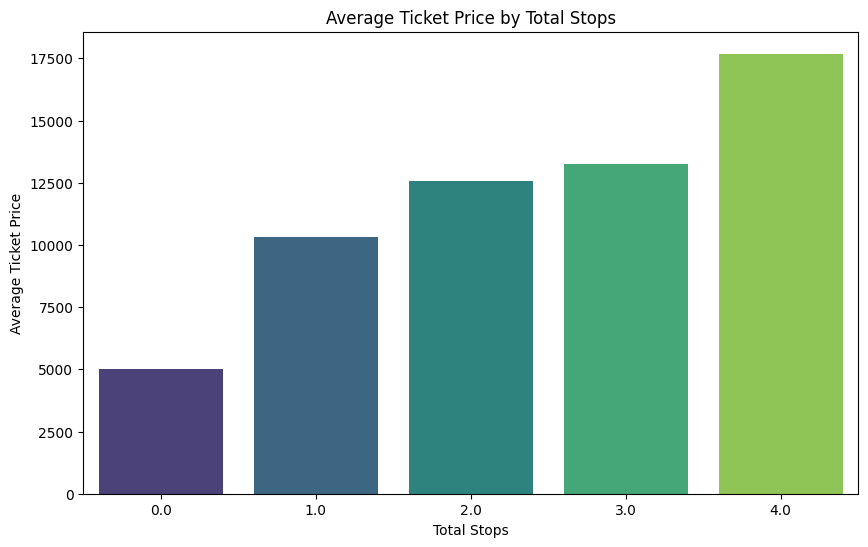

In [937]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Stops',
    y='Price',
    data=avg_price_per_stops,
    palette="viridis"
)
plt.title('Average Ticket Price by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Ticket Price')
plt.show()

In [938]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


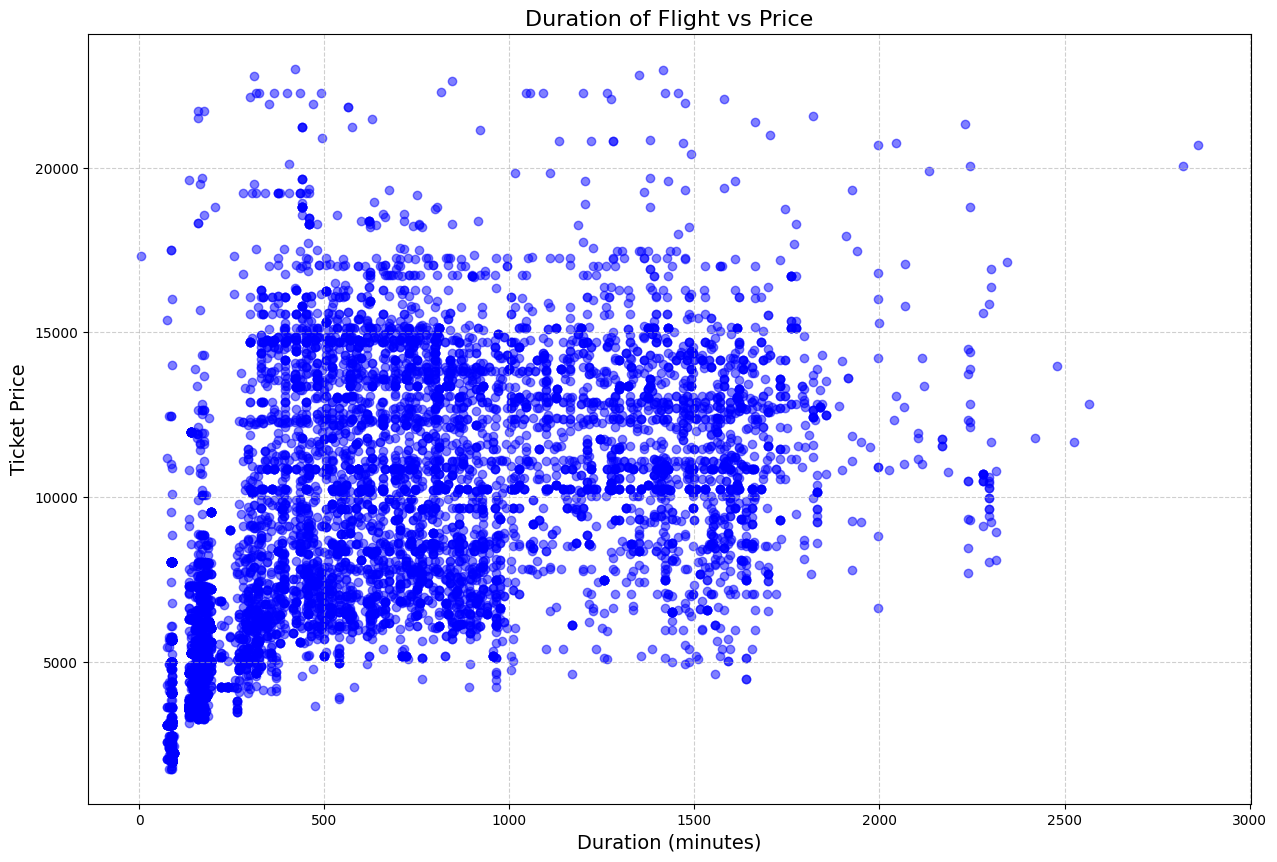

In [939]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Duration'], df['Price'], alpha=0.5, color='blue')
plt.title('Duration of Flight vs Price', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Ticket Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

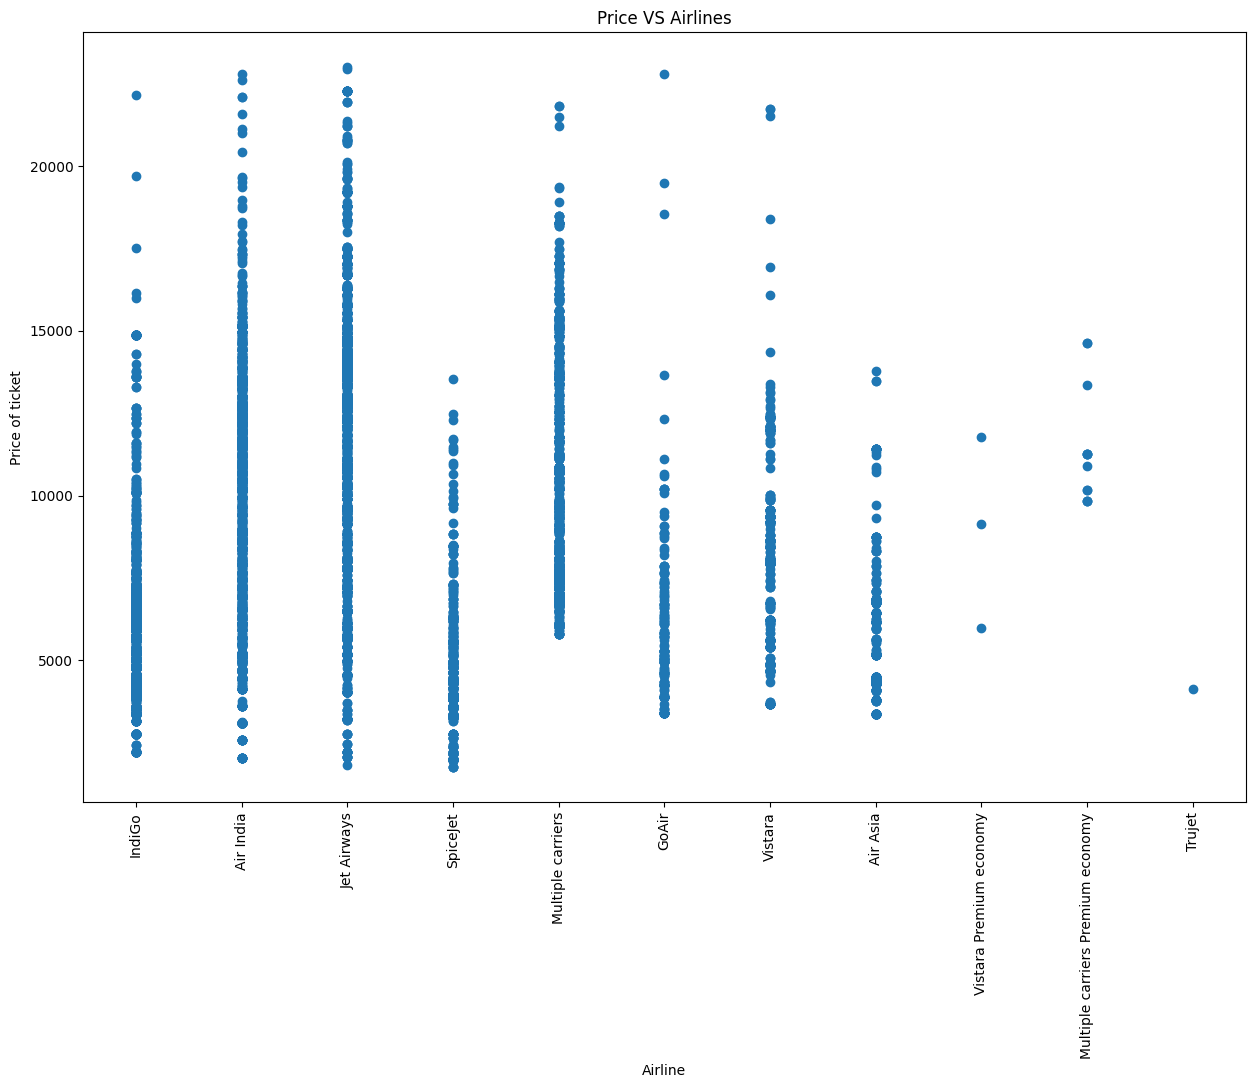

In [940]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [941]:
px.histogram(data_frame=df , x = "Source" )

In [942]:
df['Source'].value_counts()

Source
Delhi       4330
Kolkata     2859
Banglore    2107
Mumbai       692
Chennai      381
Name: count, dtype: int64

In [943]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3


In [944]:
df['Destination'].value_counts()

Destination
Cochin       4330
Banglore     2859
Delhi        1265
New Delhi     842
Hyderabad     692
Kolkata       381
Name: count, dtype: int64

In [945]:
px.histogram(data_frame=df , x = "Destination")

In [946]:
df.duplicated().sum()

2

In [947]:
df = df.drop_duplicates()


In [948]:
df.duplicated().sum()

0

In [949]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 10367 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10367 non-null  object 
 1   Source           10367 non-null  object 
 2   Destination      10367 non-null  object 
 3   Duration         10367 non-null  int64  
 4   Total_Stops      10366 non-null  float64
 5   Additional_Info  10367 non-null  object 
 6   Price            10367 non-null  int64  
 7   Dep_Hour         10367 non-null  int32  
 8   Dep_Minute       10367 non-null  int32  
 9   Journey_Day      10367 non-null  int32  
 10  Journey_Month    10367 non-null  int32  
 11  Arrival_Day      10367 non-null  int32  
 12  Arrival_Month    10367 non-null  int32  
dtypes: float64(1), int32(6), int64(2), object(4)
memory usage: 890.9+ KB


In [950]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
Arrival_Day        0
Arrival_Month      0
dtype: int64


In [951]:
df = df.dropna(subset=['Total_Stops'])

In [952]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
Arrival_Day        0
Arrival_Month      0
dtype: int64


In [953]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


In [954]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3


In [955]:
#df.drop(columns=['Arrival_Hour', 'Arrival_Minute'], inplace=True)

In [956]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


In [957]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder  ,MinMaxScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression, Ridge, Lasso,SGDRegressor ,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [958]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [959]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10366 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10366 non-null  object 
 1   Source           10366 non-null  object 
 2   Destination      10366 non-null  object 
 3   Duration         10366 non-null  int64  
 4   Total_Stops      10366 non-null  float64
 5   Additional_Info  10366 non-null  object 
 6   Dep_Hour         10366 non-null  int32  
 7   Dep_Minute       10366 non-null  int32  
 8   Journey_Day      10366 non-null  int32  
 9   Journey_Month    10366 non-null  int32  
 10  Arrival_Day      10366 non-null  int32  
 11  Arrival_Month    10366 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 809.8+ KB


In [960]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Dep_Minute', 'Journey_Day',
       'Journey_Month', 'Arrival_Day', 'Arrival_Month'],
      dtype='object')

In [961]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=102)

print('X_train.shape \t', X_train.shape) #without price 
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7774, 12)
y_train.shape 	 (7774,)
************************************************************
X_test.shape 	 (2592, 12)
y_test.shape 	 (2592,)


In [962]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [963]:
Num_Columns.head()

,Duration,Total_Stops,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,170,0.0,22,20,24,3,25,3
1,445,2.0,5,50,1,5,1,5
2,1140,2.0,9,25,9,6,10,6
3,325,1.0,18,5,12,5,12,5
4,285,1.0,16,50,1,3,1,3


In [964]:
Cat_Columns.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [965]:
Num_Columns.isnull().sum()

Duration         0
Total_Stops      0
Dep_Hour         0
Dep_Minute       0
Journey_Day      0
Journey_Month    0
Arrival_Day      0
Arrival_Month    0
dtype: int64

In [966]:
Cat_Columns.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
dtype: int64

In [967]:
Num_Steps = list()
#Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False))) 
Num_Steps.append(("Scaler", StandardScaler()))m
Num_Pipeline = Pipeline(steps=Num_Steps)

In [968]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')))
Cat_Pipeline = Pipeline(steps=Cat_Steps)


In [969]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [970]:
models = {
    "Ridge": Ridge(alpha=0.5),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "SGDRegressor": SGDRegressor()
}

In [971]:
from sklearn.metrics import mean_squared_error

results = {}
for name, model in models.items():
    steps = [
        ("Preprocessing", Transformer),
        ("Model", model)
    ]
    pipeline = Pipeline(steps=steps)

    pipeline.fit(X_train, y_train)

    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results[name] = {
        "RMSE_Train": rmse_train,
        "RMSE_Test": rmse_test
    }


for model_name, metrics in results.items():
    print(f"{model_name} - RMSE Train: {metrics['RMSE_Train']:.3f}, RMSE Test: {metrics['RMSE_Test']:.3f}")

c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+10, tolerance: 1.295e+07



Ridge - RMSE Train: 2225.621, RMSE Test: 2097.280
Lasso - RMSE Train: 2225.575, RMSE Test: 2097.172
ElasticNet - RMSE Train: 2244.882, RMSE Test: 2114.147
SGDRegressor - RMSE Train: 2243.635, RMSE Test: 2105.355


In [972]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.0001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'constant', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2251.855535748566
Test RMSE: 2107.221842977361


In [974]:
Num_Steps = list()
Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [975]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)


grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.0001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'constant', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2063.930106026001
Test RMSE: 1941.7731497553382


In [977]:
import joblib
import json
joblib.dump(best_model, "best_model.pkl")
joblib.dump(X_train.columns,"Inputs.pkl")

['Inputs.pkl']